# Pymaceuticals Inc.


## Analysis

   There is a positive correlation with weight and tumor volume found with the mice treated with the Capomulin. From the analysis it appears that mice average weight tend to increase as the average volume of the tumor increased. In addition, from the data of one particular mouse treated with the Capomulin. The tumor volume tend to decrease over time, with the most significant tumor volume drop from day 30 to day 35. The two drug regimens that overall resulted in lower the tumor volumes would be Capomulin, and Ramicane.

In [321]:
#Dependencies
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import scipy.stats as st

#Creating file paths, and making them readable.
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

#Merging the two datasets into single DataFrame.
mouse_study_complete_df = pd.merge(study_results, mouse_metadata, how='left', on=["Mouse ID", "Mouse ID"])
mouse_study_complete_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [322]:
#Finding the total number of mice in the data
mouse_id_count = len(mouse_study_complete_df["Mouse ID"].unique())
mouse_id_count

249

In [323]:
#Finding the duplicate mouse
mouse_id_duplicates = mouse_study_complete_df.loc[mouse_study_complete_df.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()
mouse_id_duplicates

array(['g989'], dtype=object)

In [324]:
#Display duplicate mouse data
duplicate_mouse_data = mouse_study_complete_df.loc[mouse_study_complete_df["Mouse ID"] == "g989",:]
duplicate_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [325]:
#Cleaning the data and taking out the duplicates
updated_mouse_study = mouse_study_complete_df[mouse_study_complete_df['Mouse ID'].isin(duplicate_mouse_data['Mouse ID'])==False]
cleaned_mouse_study = updated_mouse_study
cleaned_mouse_study_count = len(updated_mouse_study['Mouse ID'].value_counts())
cleaned_mouse_study_count

248

# Summary Statistics

In [326]:
#Creating a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen 
tumor_volume_mean = updated_mouse_study.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
tumor_volume_median = updated_mouse_study.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
tumor_volume_variance = updated_mouse_study.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
tumor_volume_std_dev = updated_mouse_study.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
tumor_volume_std_err = updated_mouse_study.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()

#Creating a single dataframe with the summary statistics results
summary_stat_table = pd.DataFrame({"Mean Tumor Volume": tumor_volume_mean, 
                                   "Median Tumor Volume": tumor_volume_median, 
                                   "Tumor Volume Variance": tumor_volume_variance,
                                   "Tumor Volume Std. Dev.": tumor_volume_std_dev,
                                   "Tumor Volume Std. Err.": tumor_volume_std_err})
summary_stat_table

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


# Bar and Pie Charts 

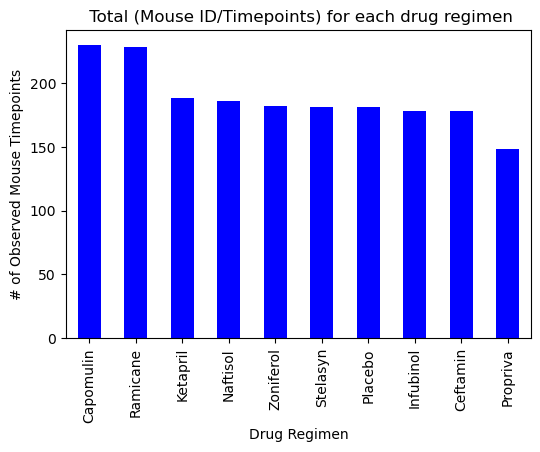

In [327]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
bar_chart_data = cleaned_mouse_study["Drug Regimen"].value_counts()
bar_chart_pandas = bar_chart_data.plot(kind='bar', facecolor='blue', figsize= (6,4),
                                           title= " Total (Mouse ID/Timepoints) for each drug regimen",
                                           xlabel= "Drug Regimen",
                                           ylabel= "# of Observed Mouse Timepoints")
plt.show()

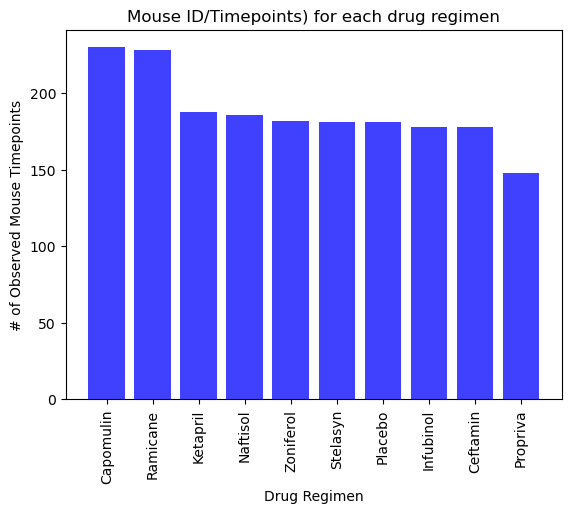

In [328]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
bar_chart_data = cleaned_mouse_study["Drug Regimen"].value_counts()
drug_regimen_count = bar_chart_data.index.values
drug_regimen = bar_chart_data.values
x_axis = drug_regimen_count
y_axis = drug_regimen

bar_chart_pyplot = plt.bar(x_axis, y_axis, color='b', alpha=0.75, align='center')

plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation='vertical')
plt.title('Mouse ID/Timepoints) for each drug regimen') 


plt.show()

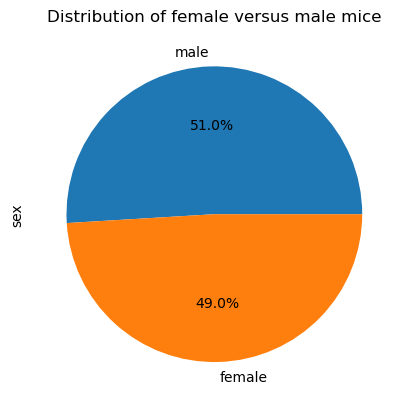

In [329]:
#Generate a pie plot showing the distribution of female versus male mice using Pyplot
pie_chart_data = cleaned_mouse_study["Sex"].value_counts()
labels= ["male","female"]
size = pie_chart_data 

pie_chart_pyplot = plt.pie(size, labels=labels, autopct="%1.1f%%")
plt.ylabel("sex")
plt.title("Distribution of female versus male mice")

plt.show()

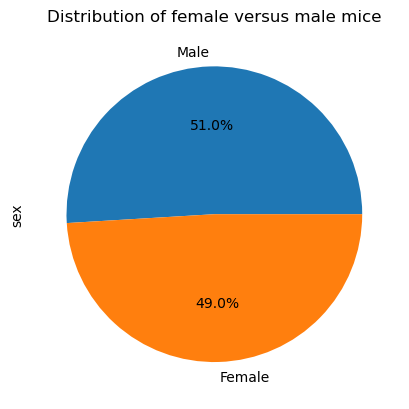

In [330]:
#Generate a pie plot showing the distribution of female versus male mice using Pandas
pie_chart_data = cleaned_mouse_study["Sex"].value_counts()
pie_chart_pandas = pie_chart_data.plot(kind='pie',ylabel="sex", title="Distribution of female versus male mice",autopct="%1.1f%%" )

plt.show()

# Quartiles, Outliers and Boxplots

In [336]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_timepoint = cleaned_mouse_study.groupby(["Mouse ID"])["Timepoint"].max()
final_timepoint.reset_index()
final_timepoint_df = pd.merge(final_timepoint, cleaned_mouse_study, on=["Mouse ID", "Timepoint"], how='left')
# Put treatments into a list for for loop (and later for plot labels)
promising_regimen = ["Capomulin","Ramicane","Infubinol","Ceftamin"]
# Create empty list to fill with tumor vol data (for plotting)
final_tumor_list = []

final_timepoint_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [337]:
def regimen_outliers(regimen):
    regimen_data = final_timepoint_df.loc[final_timepoint_df["Drug Regimen"] == regimen]['Tumor Volume (mm3)']
    
    quartiles = regimen_data.quantile([0.25,0.50,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    outliers = regimen_data.loc[(regimen_data < lower_bound) | (regimen_data > upper_bound)]
    print(f"{regimen}'s potential outliers:{outliers}")
    return regimen_data
    
capi_regimen = regimen_outliers("Capomulin")
rami_regimen = regimen_outliers("Ramicane")
infu_regimen = regimen_outliers("Infubinol")
ceft_regimen = regimen_outliers("Ceftamin")

Capomulin's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers:31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)


In [338]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for test_drug in promising_regimen:
    regimen_list = final_timepoint_df.loc[final_timepoint_df["Drug Regimen"] == test_drug,:]
    quartiles = regimen_list["Tumor Volume (mm3)"].quantile([0.25,0.50,0.75])
    lowerq = quartiles[0.25].round(6)
    upperq = quartiles[0.75].round(6)
    iqr = (upperq-lowerq).round(6)
    lower_bound = (lowerq - (1.5*iqr)).round(6)
    upper_bound = (upperq + (1.5*iqr)).round(6)
    
    print(f"The lower quartile for the {test_drug} Drug Regimen is: {lowerq}")
    print(f"The upper quartile for the {test_drug} Drug Regimen is: {upperq}")
    print(f"The interquartile range for the {test_drug} Drug Regimen is: {iqr}")
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    print(" ")

    outlier_vol = regimen_list.loc[(regimen['Tumor Volume (mm3)'] < lower_bound) | (regimen_list['Tumor Volume (mm3)'] > upper_bound)]
    
    regimen_list = regimen_list.loc[:,"Tumor Volume (mm3)"]
    final_tumor_list.append(regimen_list)

The lower quartile for the Capomulin Drug Regimen is: 32.377357
The upper quartile for the Capomulin Drug Regimen is: 40.15922
The interquartile range for the Capomulin Drug Regimen is: 7.781863
Values below 20.704562 could be outliers.
Values above 51.832014 could be outliers.
 
The lower quartile for the Ramicane Drug Regimen is: 31.56047
The upper quartile for the Ramicane Drug Regimen is: 40.659006
The interquartile range for the Ramicane Drug Regimen is: 9.098536
Values below 17.912666 could be outliers.
Values above 54.30681 could be outliers.
 
The lower quartile for the Infubinol Drug Regimen is: 54.048608
The upper quartile for the Infubinol Drug Regimen is: 65.525743
The interquartile range for the Infubinol Drug Regimen is: 11.477135
Values below 36.832906 could be outliers.
Values above 82.741446 could be outliers.
 
The lower quartile for the Ceftamin Drug Regimen is: 48.722078
The upper quartile for the Ceftamin Drug Regimen is: 64.29983
The interquartile range for the Ce

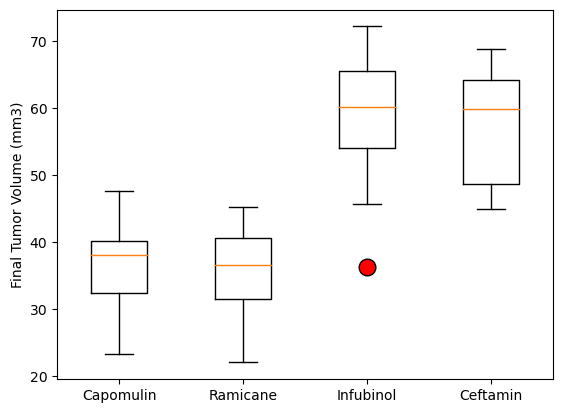

In [339]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
outlier = dict(markerfacecolor= 'red', markersize = 12)
plt.ylabel("Final Tumor Volume (mm3)")
plt.boxplot(final_tumor_list, labels=promising_regimen, flierprops = outlier)
  
plt.show()

# Line and Scatter Plots

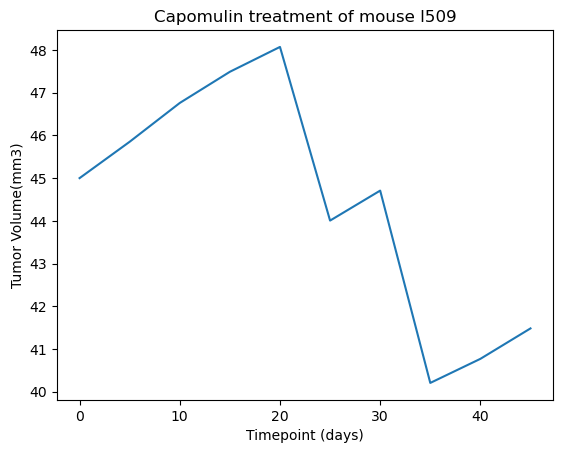

In [340]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

#Creating list of mouse id treated with Capomulin
capomulin_treatment = cleaned_mouse_study.loc[cleaned_mouse_study["Drug Regimen"] == "Capomulin"]

one_mouse_id = cleaned_mouse_study.loc[cleaned_mouse_study["Mouse ID"] == "l509"]

x_data = one_mouse_id["Timepoint"]
y_data = one_mouse_id["Tumor Volume (mm3)"]
x_axis = x_data
y_axis = y_data

plt.plot(x_axis, y_axis)
plt.title("Capomulin treatment of mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume(mm3)")

plt.show()

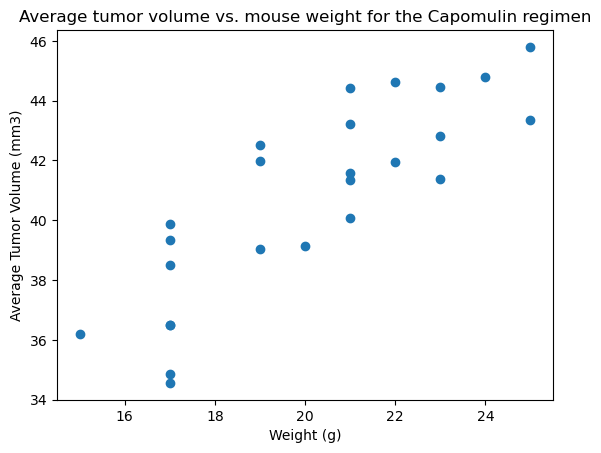

In [341]:
#Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
avg_capomulin_treatment = capomulin_treatment.groupby(["Mouse ID"])["Tumor Volume (mm3)"].mean()
weight = capomulin_treatment.groupby(["Mouse ID"])["Weight (g)"].mean()

plt.scatter(weight,avg_capomulin_treatment )
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Average tumor volume vs. mouse weight for the Capomulin regimen")

plt.show()

# Correlation and Regression 

The correlation between mouse weight and the average tumor volume is 0.84


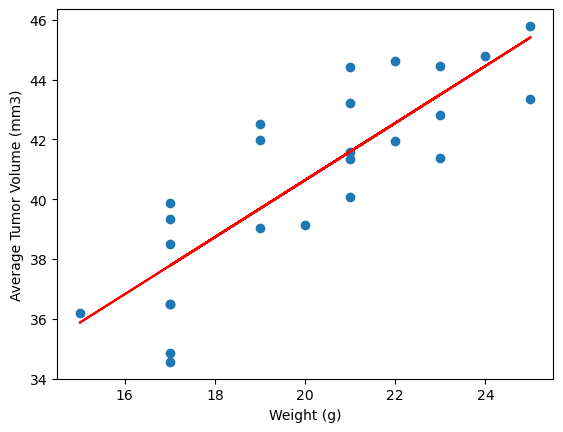

In [342]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr(weight,avg_capomulin_treatment)
study_correlation = round(correlation[0],2)

(slope, intercept, rvalue, pvalue, stderr) = linregress(weight,avg_capomulin_treatment)
regress_values = weight * slope + intercept

plt.scatter(weight,avg_capomulin_treatment )
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.plot(weight,regress_values, "r-")

print(f'The correlation between mouse weight and the average tumor volume is {study_correlation}')

plt.show()